# MNIST (Modified National Institute of Standards and Technology database)

To get the files from the following website, these files will be used to train. 

[http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

## Reading bytes from files

First we get the images from our zipped file in the data folder.

The imports we will need:

In [24]:
import sklearn.preprocessing as pre
import gzip
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import keras as kr
import sklearn.preprocessing as pre

Read in a zipped file and unzip an image. Read in the image as a byte array.

In [25]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

Reshape the byte array into a 2D array with 28x28 indecies.

In [26]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

Now we can show that image as a plot of the data

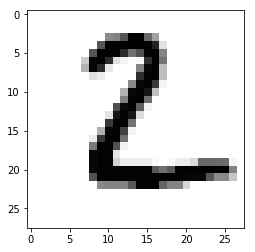

In [27]:
plt.imshow(image, cmap='gray')

## Neural network

To build a neural network we need some data to train the network and data to test against it.

In [28]:
# Read in images
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

# read in labels
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
# Read in images for testing
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

# Read in labels for testing
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()

We will mow use keras to create the network.

In [29]:
# Start a neural network, building it by layers.
# using sequential model
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

We can reshape the arrays produce by the traning images and labels, so that they create 28x28 2D arrays.

In [30]:
# reshape the images and labels into 28x28 arrays.    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

Reshape using tensor of 600000, with arrays of 28*28= 784

In [31]:
# reshape the image array 
inputs = train_img.reshape(60000, 784)

In [32]:
# Binarize labels in a one-vs-all fashion
encoder = pre.LabelBinarizer()

# Trains the encoder
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

In [33]:
# Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(inputs, outputs, epochs=15, batch_size=10)

Epoch 1/15
60000/60000 [==============================] - 65s 1ms/step - loss: 14.4354 - acc: 0.1044
Epoch 2/15
60000/60000 [==============================] - 103s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 3/15
60000/60000 [==============================] - 122s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 4/15
60000/60000 [==============================] - 119s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 5/15
60000/60000 [==============================] - 118s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 6/15
60000/60000 [==============================] - 118s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 7/15
60000/60000 [==============================] - 121s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 8/15
60000/60000 [==============================] - 120s 2ms/step - loss: 14.4351 - acc: 0.1044
Epoch 9/15
60000/60000 [==============================] - 68s 1ms/step - loss: 14.4351 - acc: 0.1044
Epoch 10/15
60000/60000 [==============================] - 67s 1ms/step - loss: 14.4

We can see from the testing that the neural network is only correct 10% of the time, As we are dealing with digits only between 0-9, this means it is no better off than simply guessing or having a random number generator guess the answer for us.

We can now use our test images and labels to test it.
We start by using the test data that we read in earlier, images and labels that were not in the training data.

In [34]:
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)